# World Happiness Report Project

**Project Description**

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


**What is Dystopia?**

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


**What are the residuals?**

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


**What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**
                                                     
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.


The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
    
You need to predict the happiness score considering all the other factors mentioned in the dataset.


Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the dataset and print head**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
print('Shape of dataset => ',dataset.shape)

Shape of dataset =>  (158, 12)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**Check null values(if any)**

In [5]:
dataset.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**As there are no null values present, we can proceed further**

**Data Description**

In [6]:
dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Seperating categorical and numerical features**

In [7]:
categorical_col = []
for i in dataset.dtypes.index:
    if dataset.dtypes[i] == object:
        categorical_col.append(i)
print('Categorical Columns: ', categorical_col)

numerical_col = []
for i in dataset.dtypes.index:
    if dataset.dtypes[i] != object:
        numerical_col.append(i)
print('Numerical Columns: ', numerical_col)

Categorical Columns:  ['Country', 'Region']
Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [8]:
dataset['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [9]:
dataset['Country'].value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

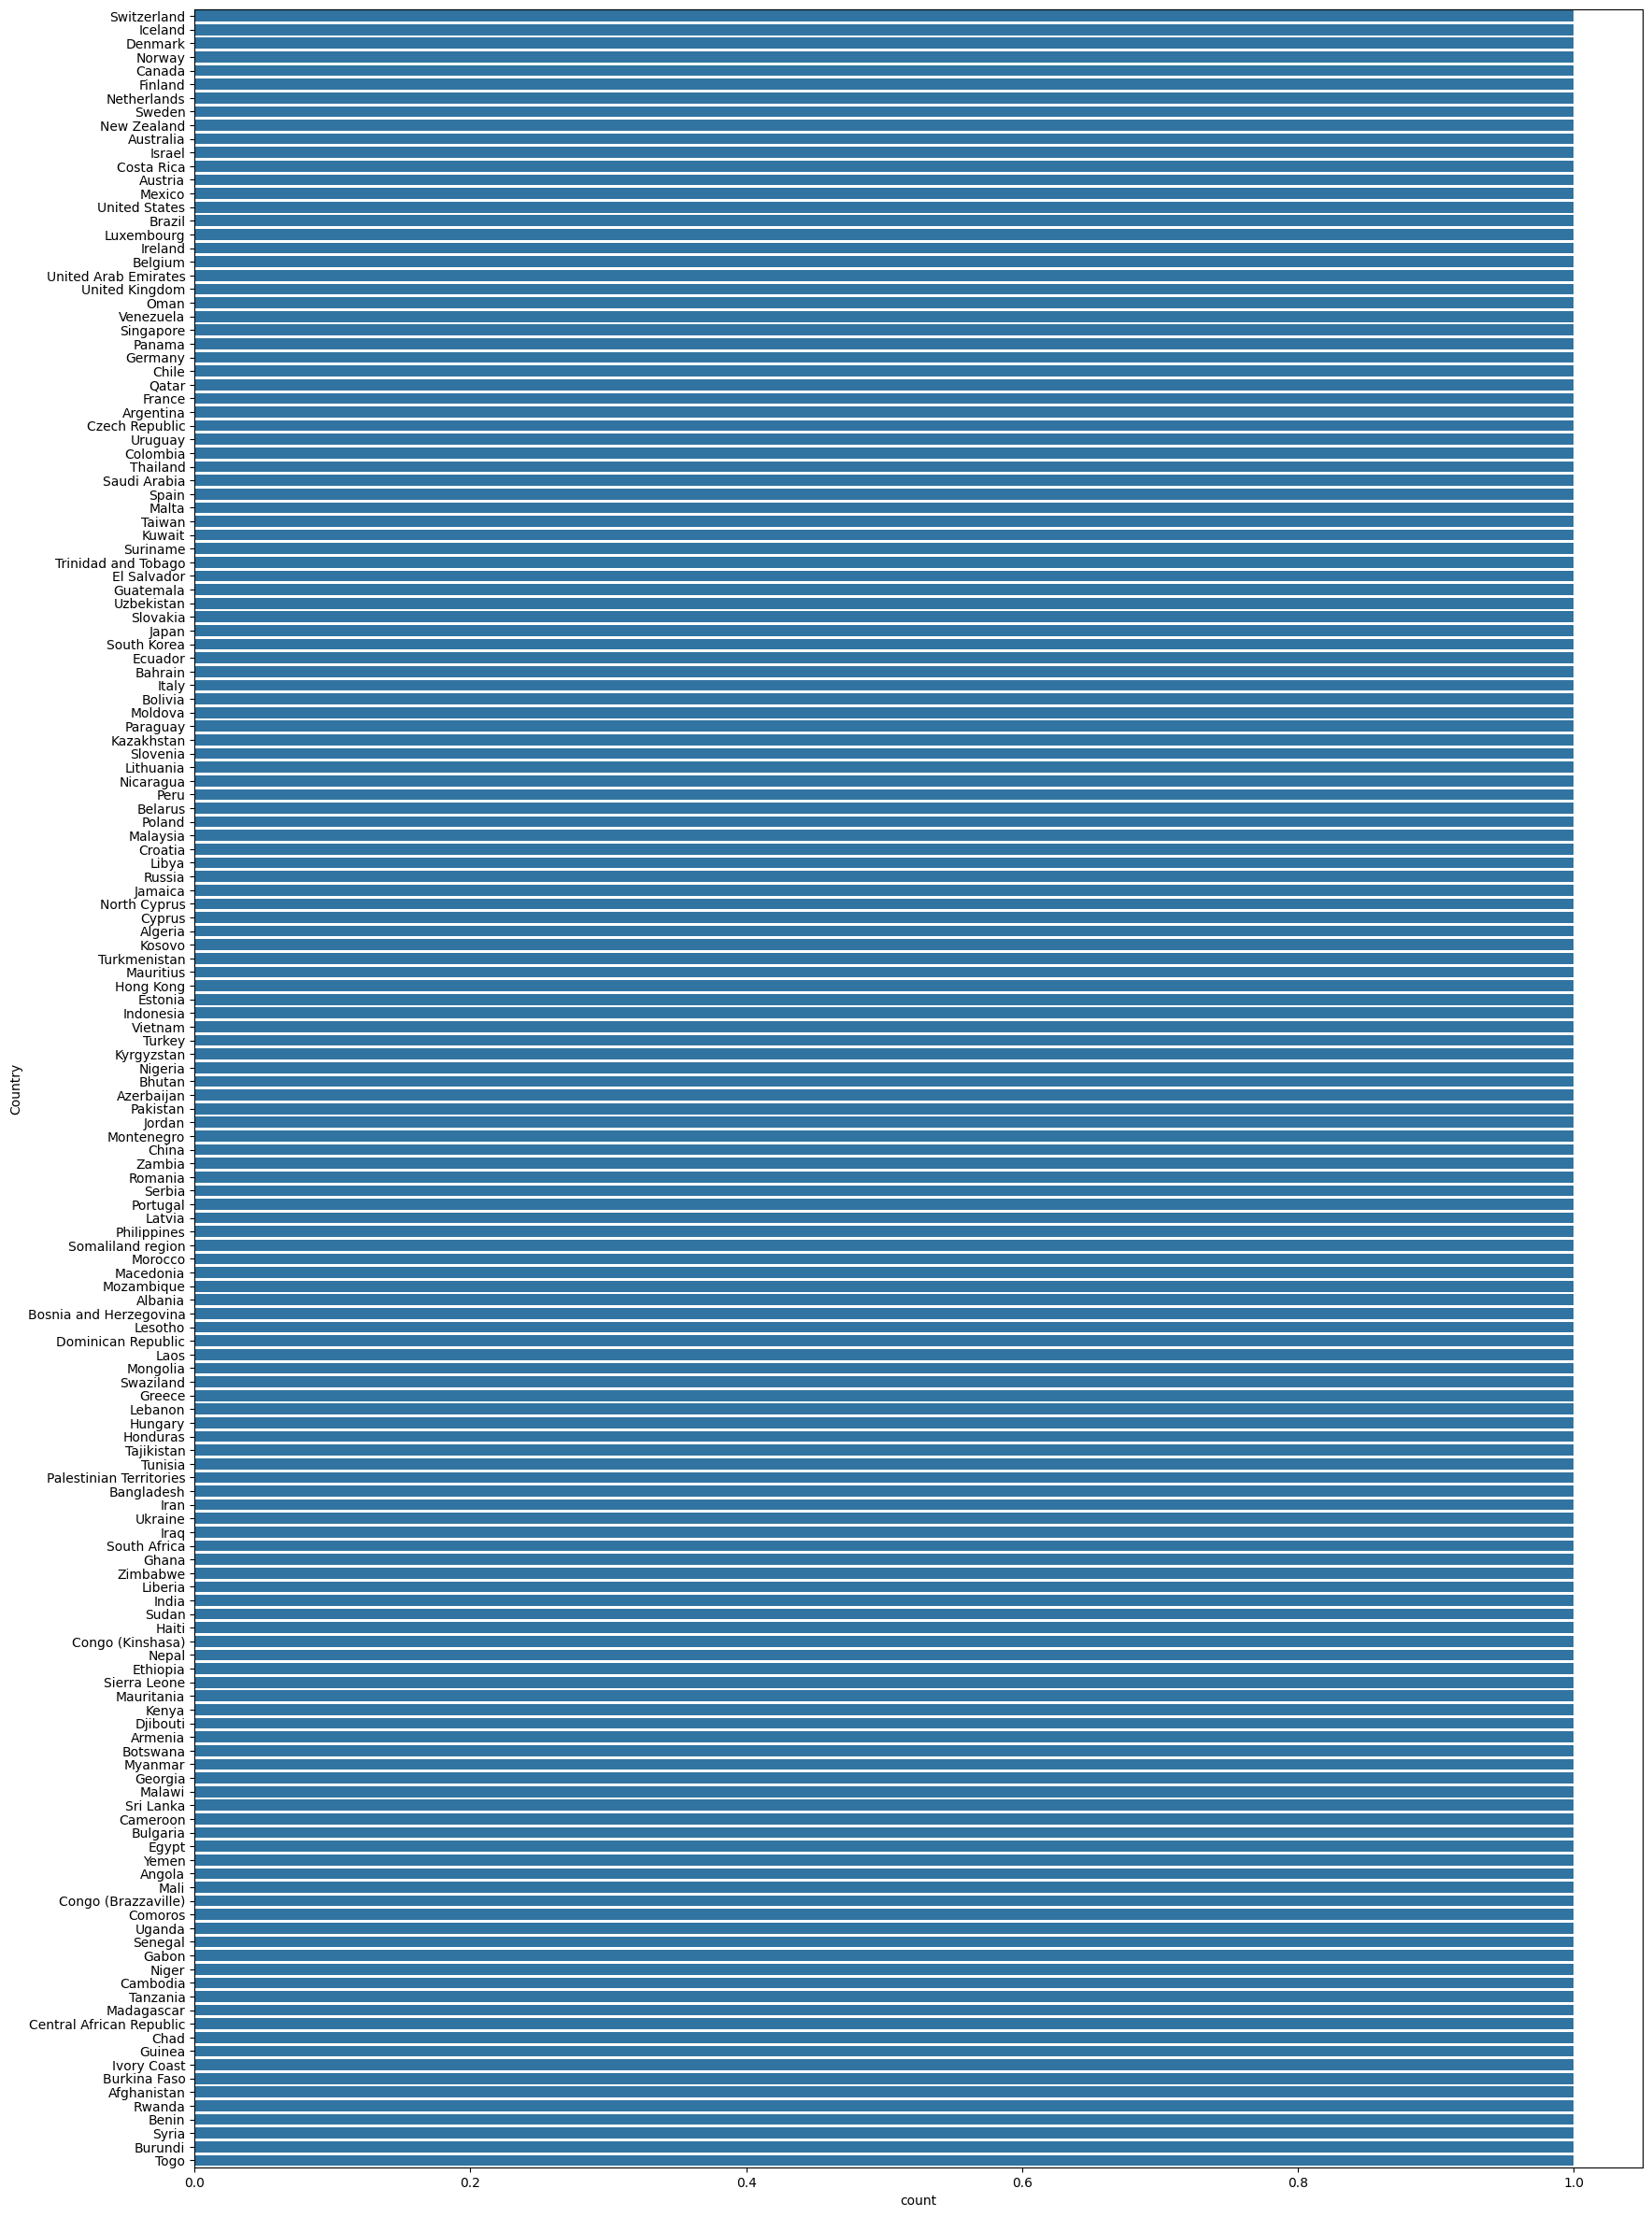

In [10]:
plt.figure(figsize = (20,30))
sns.countplot(dataset['Country'])
plt.show()

Check if there are any whitespaces in Country column

In [11]:
dataset[dataset['Country'] == '']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


There are no whitespaces in Country column

In [12]:
dataset['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [13]:
dataset['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Region'>

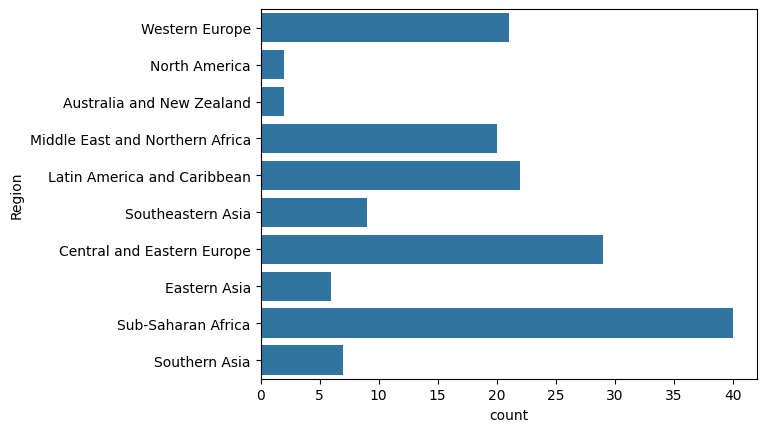

In [14]:
sns.countplot(dataset['Region'])

Drop the column Country as each rows belongs to different country

In [15]:
dataset.drop(columns = ['Country'],axis = 1,inplace = True)
dataset.sample(n = 10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
91,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
80,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
124,Sub-Saharan Africa,125,4.419,0.04734,0.36471,0.99876,0.41435,0.42215,0.05839,0.37542,1.78555
127,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181
126,Central and Eastern Europe,127,4.350,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
94,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
88,Central and Eastern Europe,89,5.098,0.04640,1.11312,1.09562,0.72437,0.29671,0.06332,0.18226,1.62215
67,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
148,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
58,Central and Eastern Europe,59,5.813,0.03938,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046,2.13090


In [16]:
dataset['Region'].replace({
    'Sub-Saharan Africa':0,
    'Central and Eastern Europe':1,
    'Latin America and Caribbean':2,
    'Western Europe':3,
    'Middle East and Northern Africa':4,
    'Southeastern Asia':5,
    'Southern Asia':6,
    'Eastern Asia':7,
    'North America':8,
    'Australia and New Zealand':9  
    
},inplace = True)

In [17]:
dataset['Region'].head()

0    3
1    3
2    3
3    3
4    8
Name: Region, dtype: int64

Multivariate Analysis

<Figure size 3000x3000 with 0 Axes>

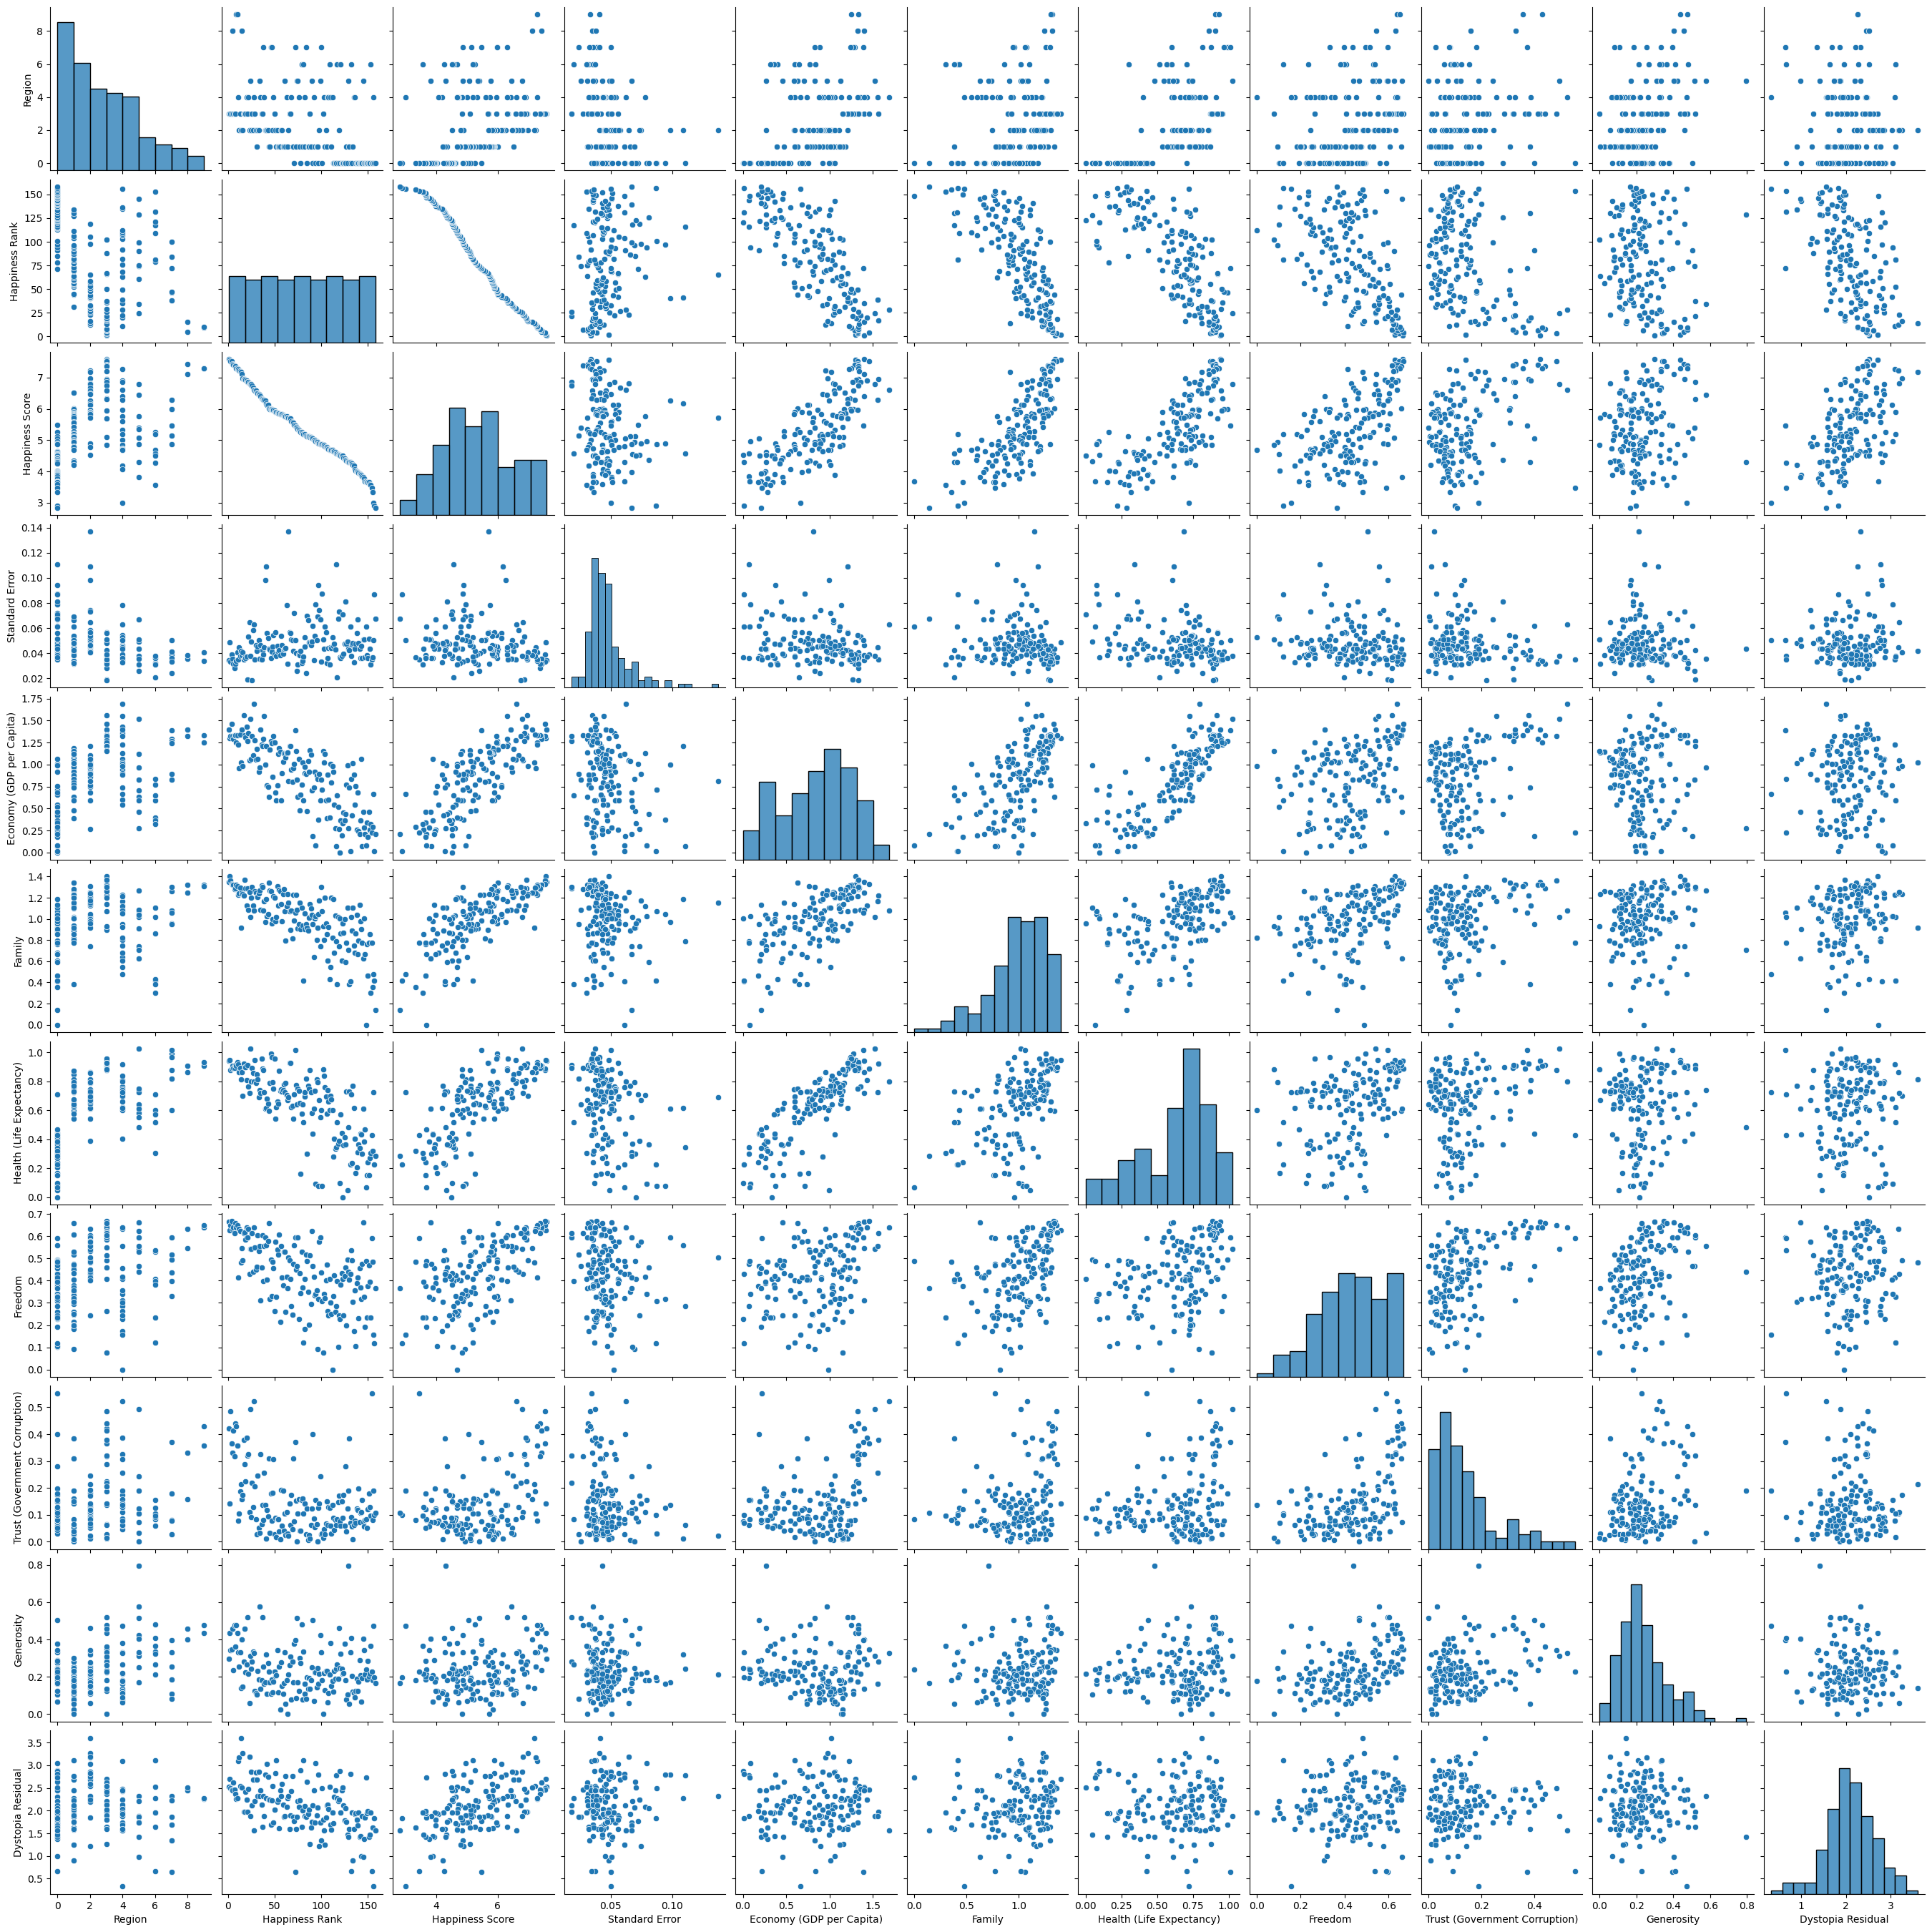

In [18]:
plt.figure(figsize = (30,30))
sns.pairplot(dataset)
plt.show()

Check Normal Distribution

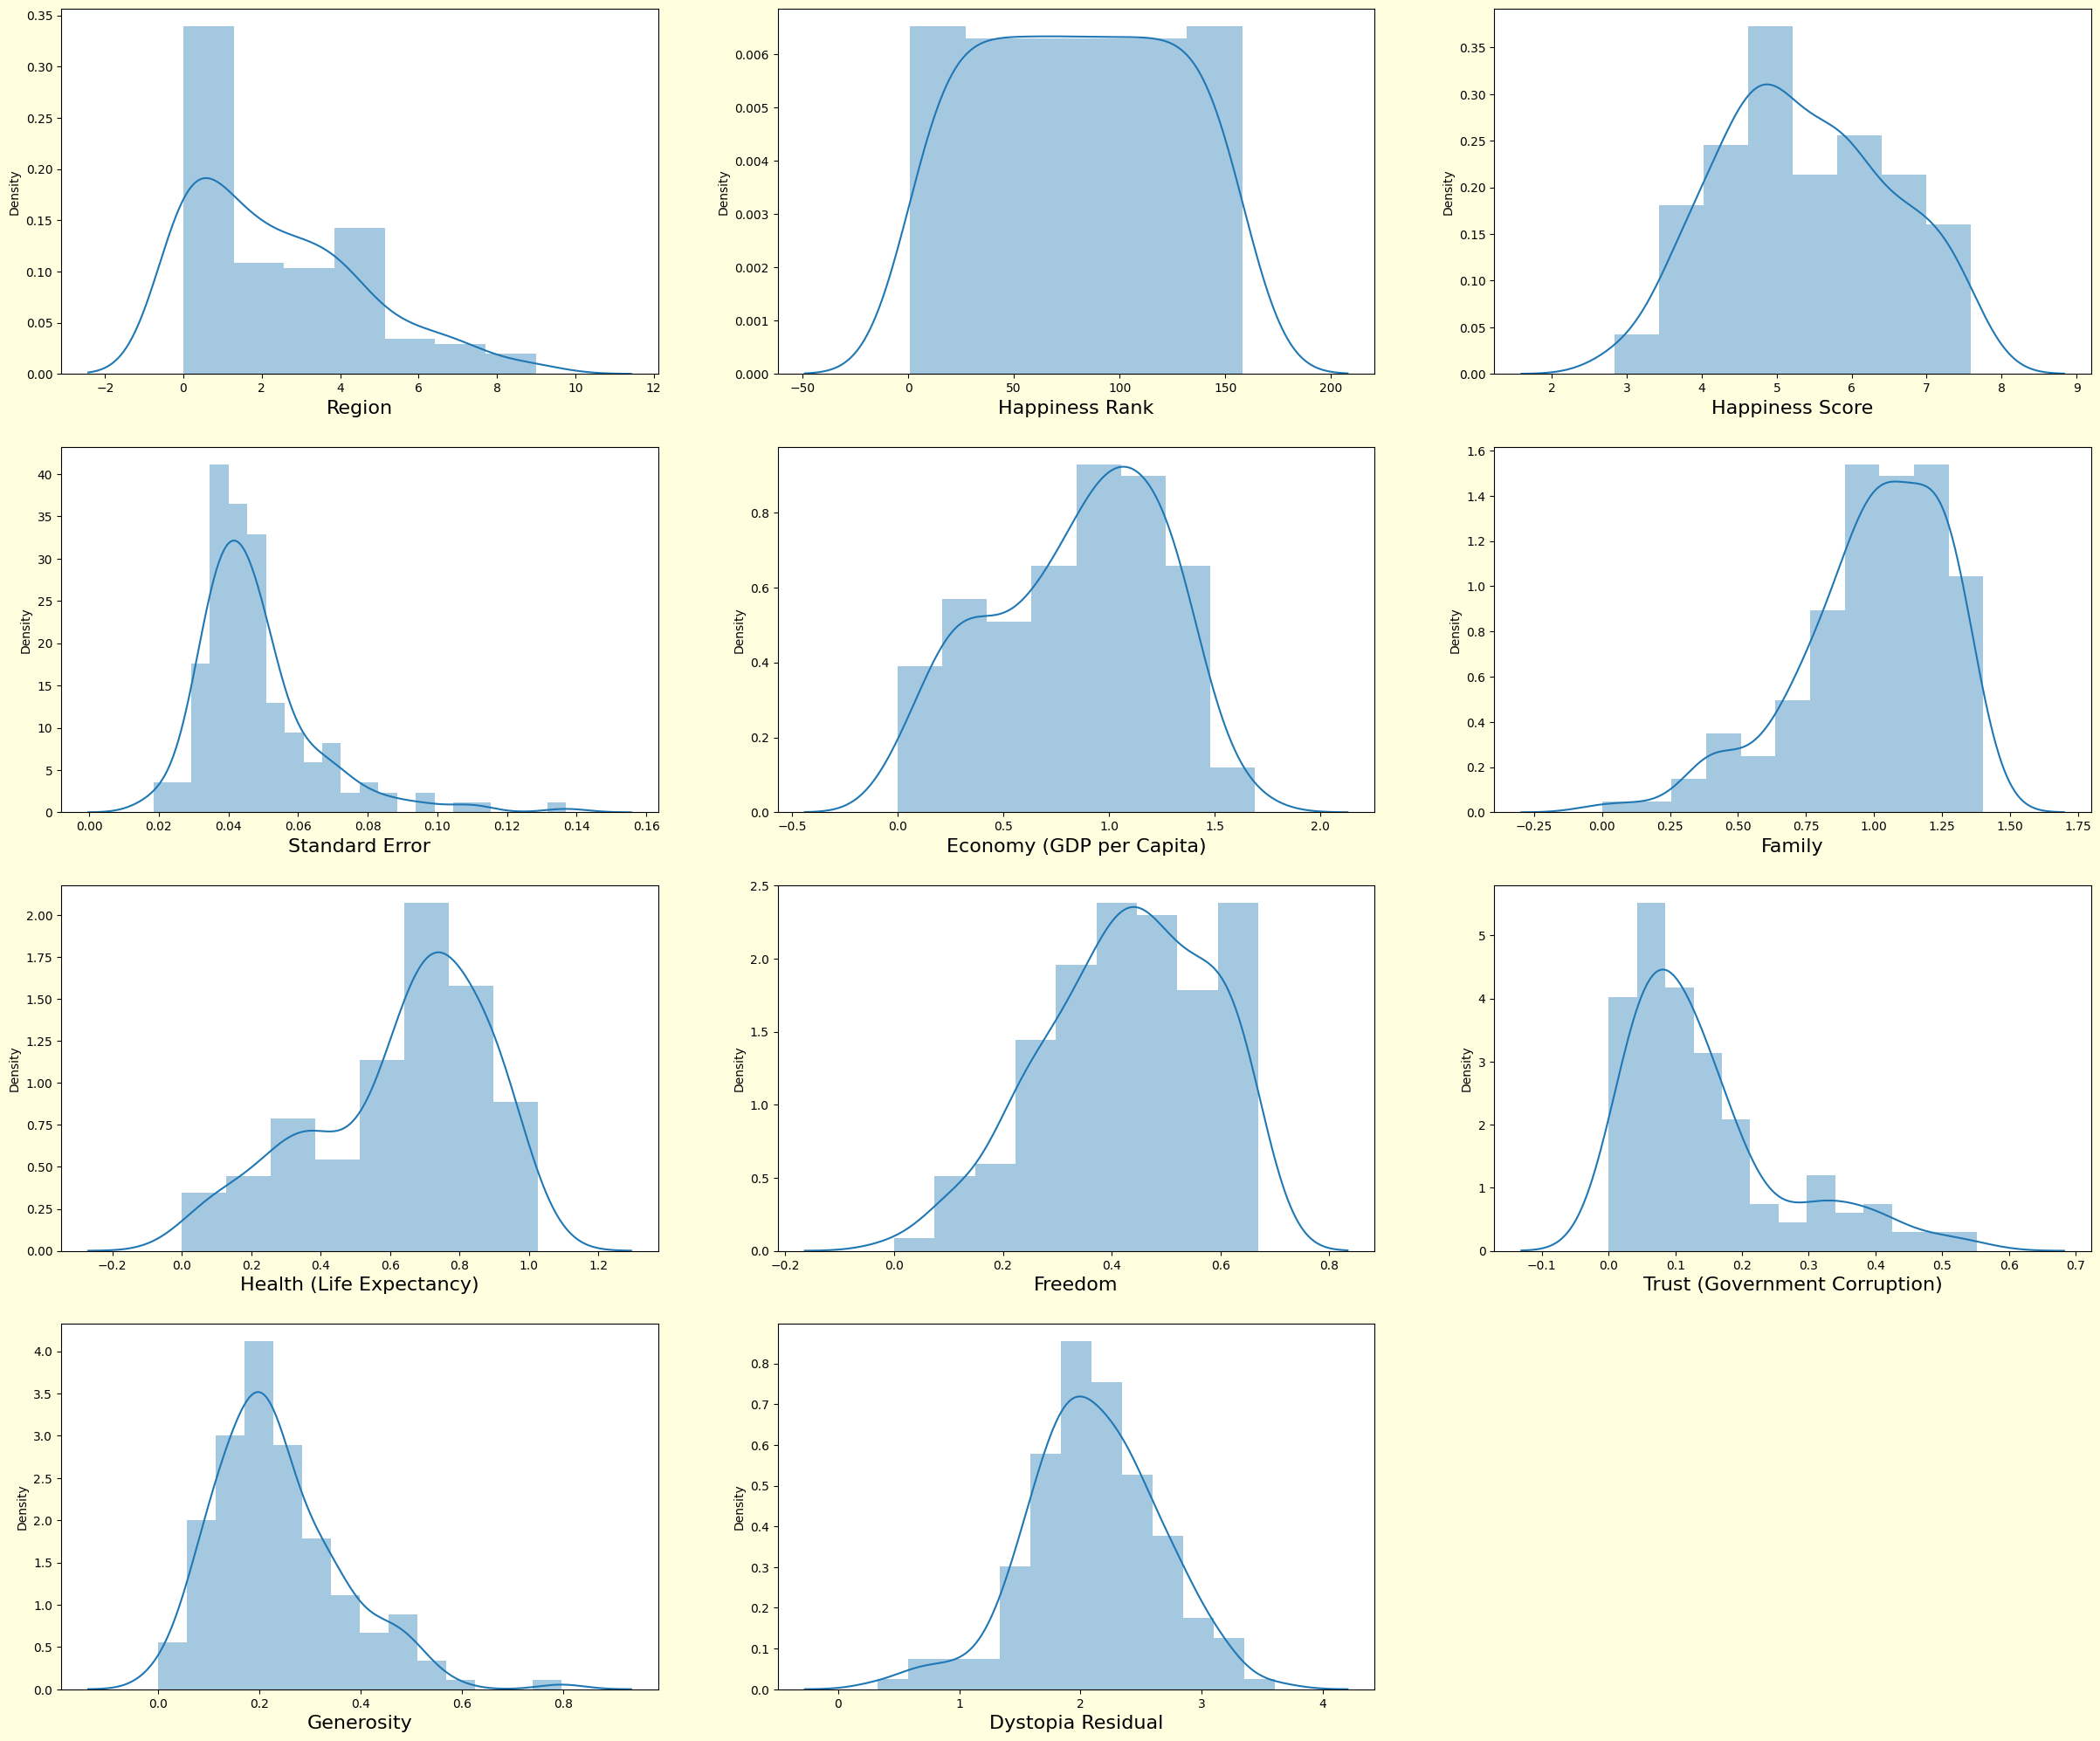

In [19]:
plt.figure(figsize = (30,25),facecolor = 'lightyellow')
plotnumber = 1

for column in dataset.columns:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber +=1
plt.show()        

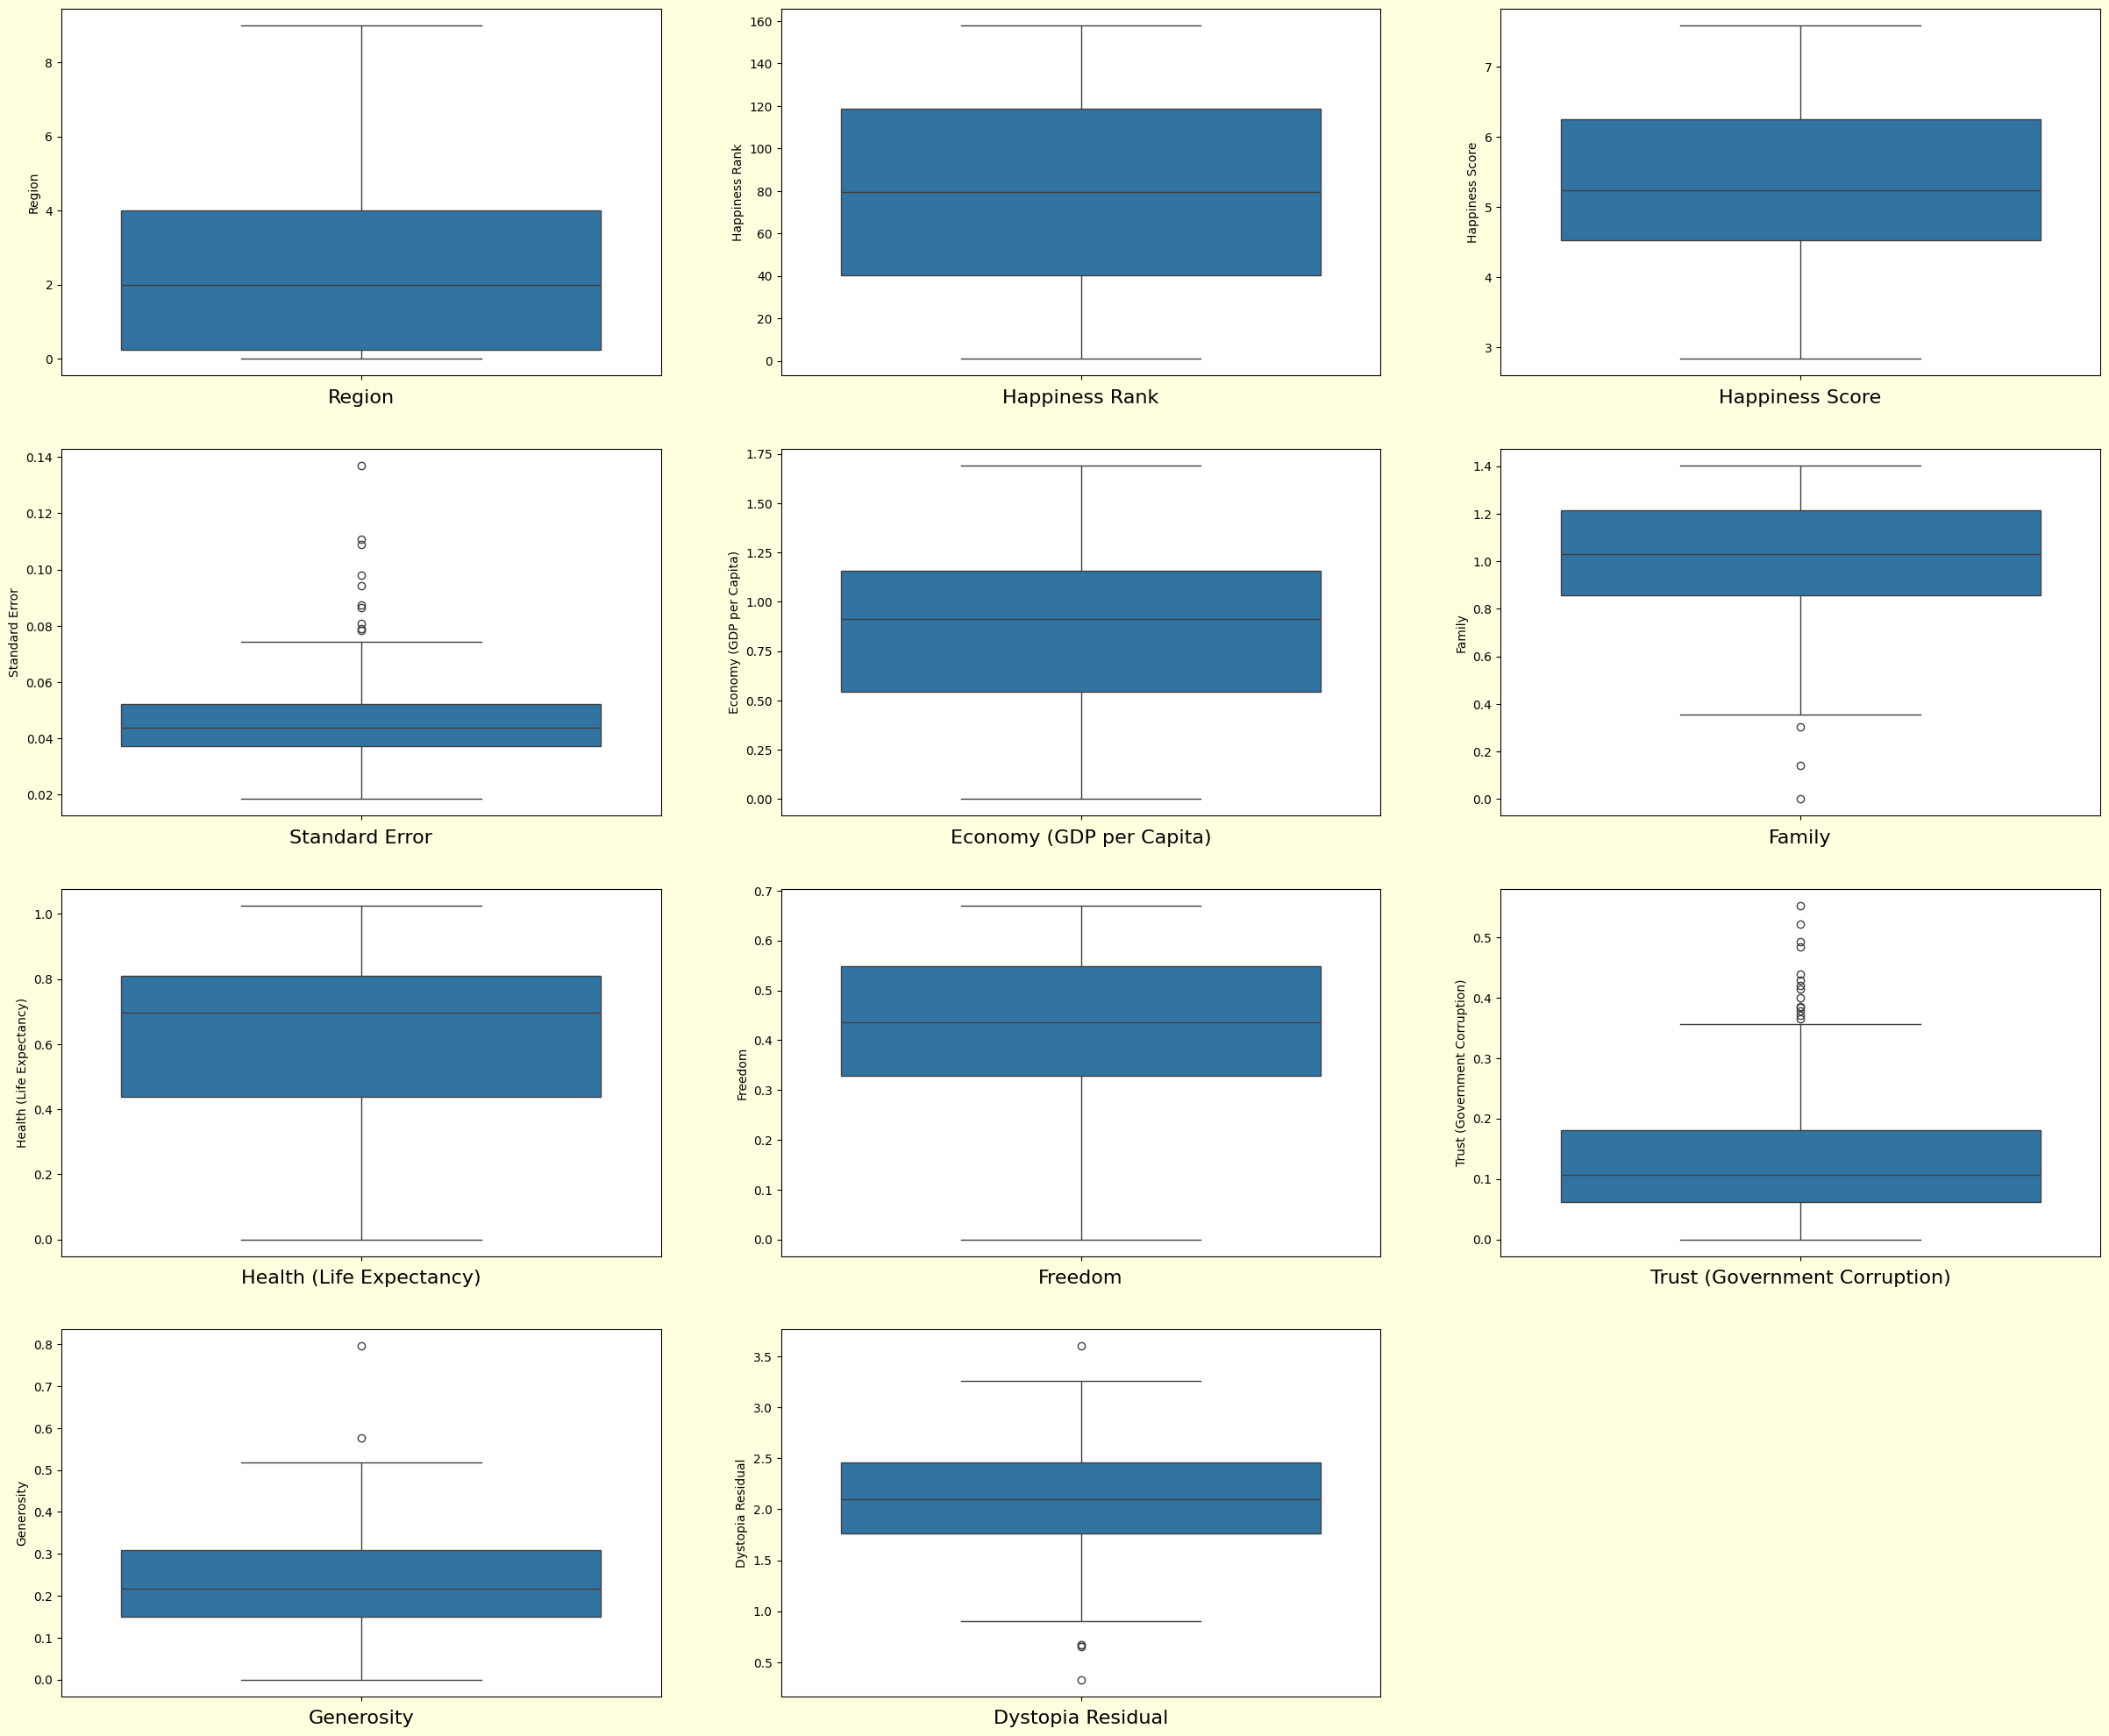

In [20]:
plt.figure(figsize = (30,25),facecolor = 'lightyellow')
plotnumber = 1

for column in dataset.columns:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(dataset[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber +=1
plt.show()

Use z-score statistics to treat outliers

In [21]:
from scipy.stats import zscore

z_score = zscore(dataset[['Standard Error','Family','Generosity','Dystopia Residual','Trust (Government Corruption)']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
dataset = dataset[filtering_entry]
dataset.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2.429530,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,2.239857,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,0.000000,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,1.000000,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,2.000000,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,4.000000,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,9.000000,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


In [22]:
dataset.shape

(149, 11)

In [23]:
dataset.sample(n =15)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
30,1,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
35,3,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
154,0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
42,2,43,6.123,0.05224,0.74553,1.04356,0.64425,0.57733,0.09472,0.27489,2.74255
74,5,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
129,1,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
47,2,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942
127,0,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181
71,7,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
106,4,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466


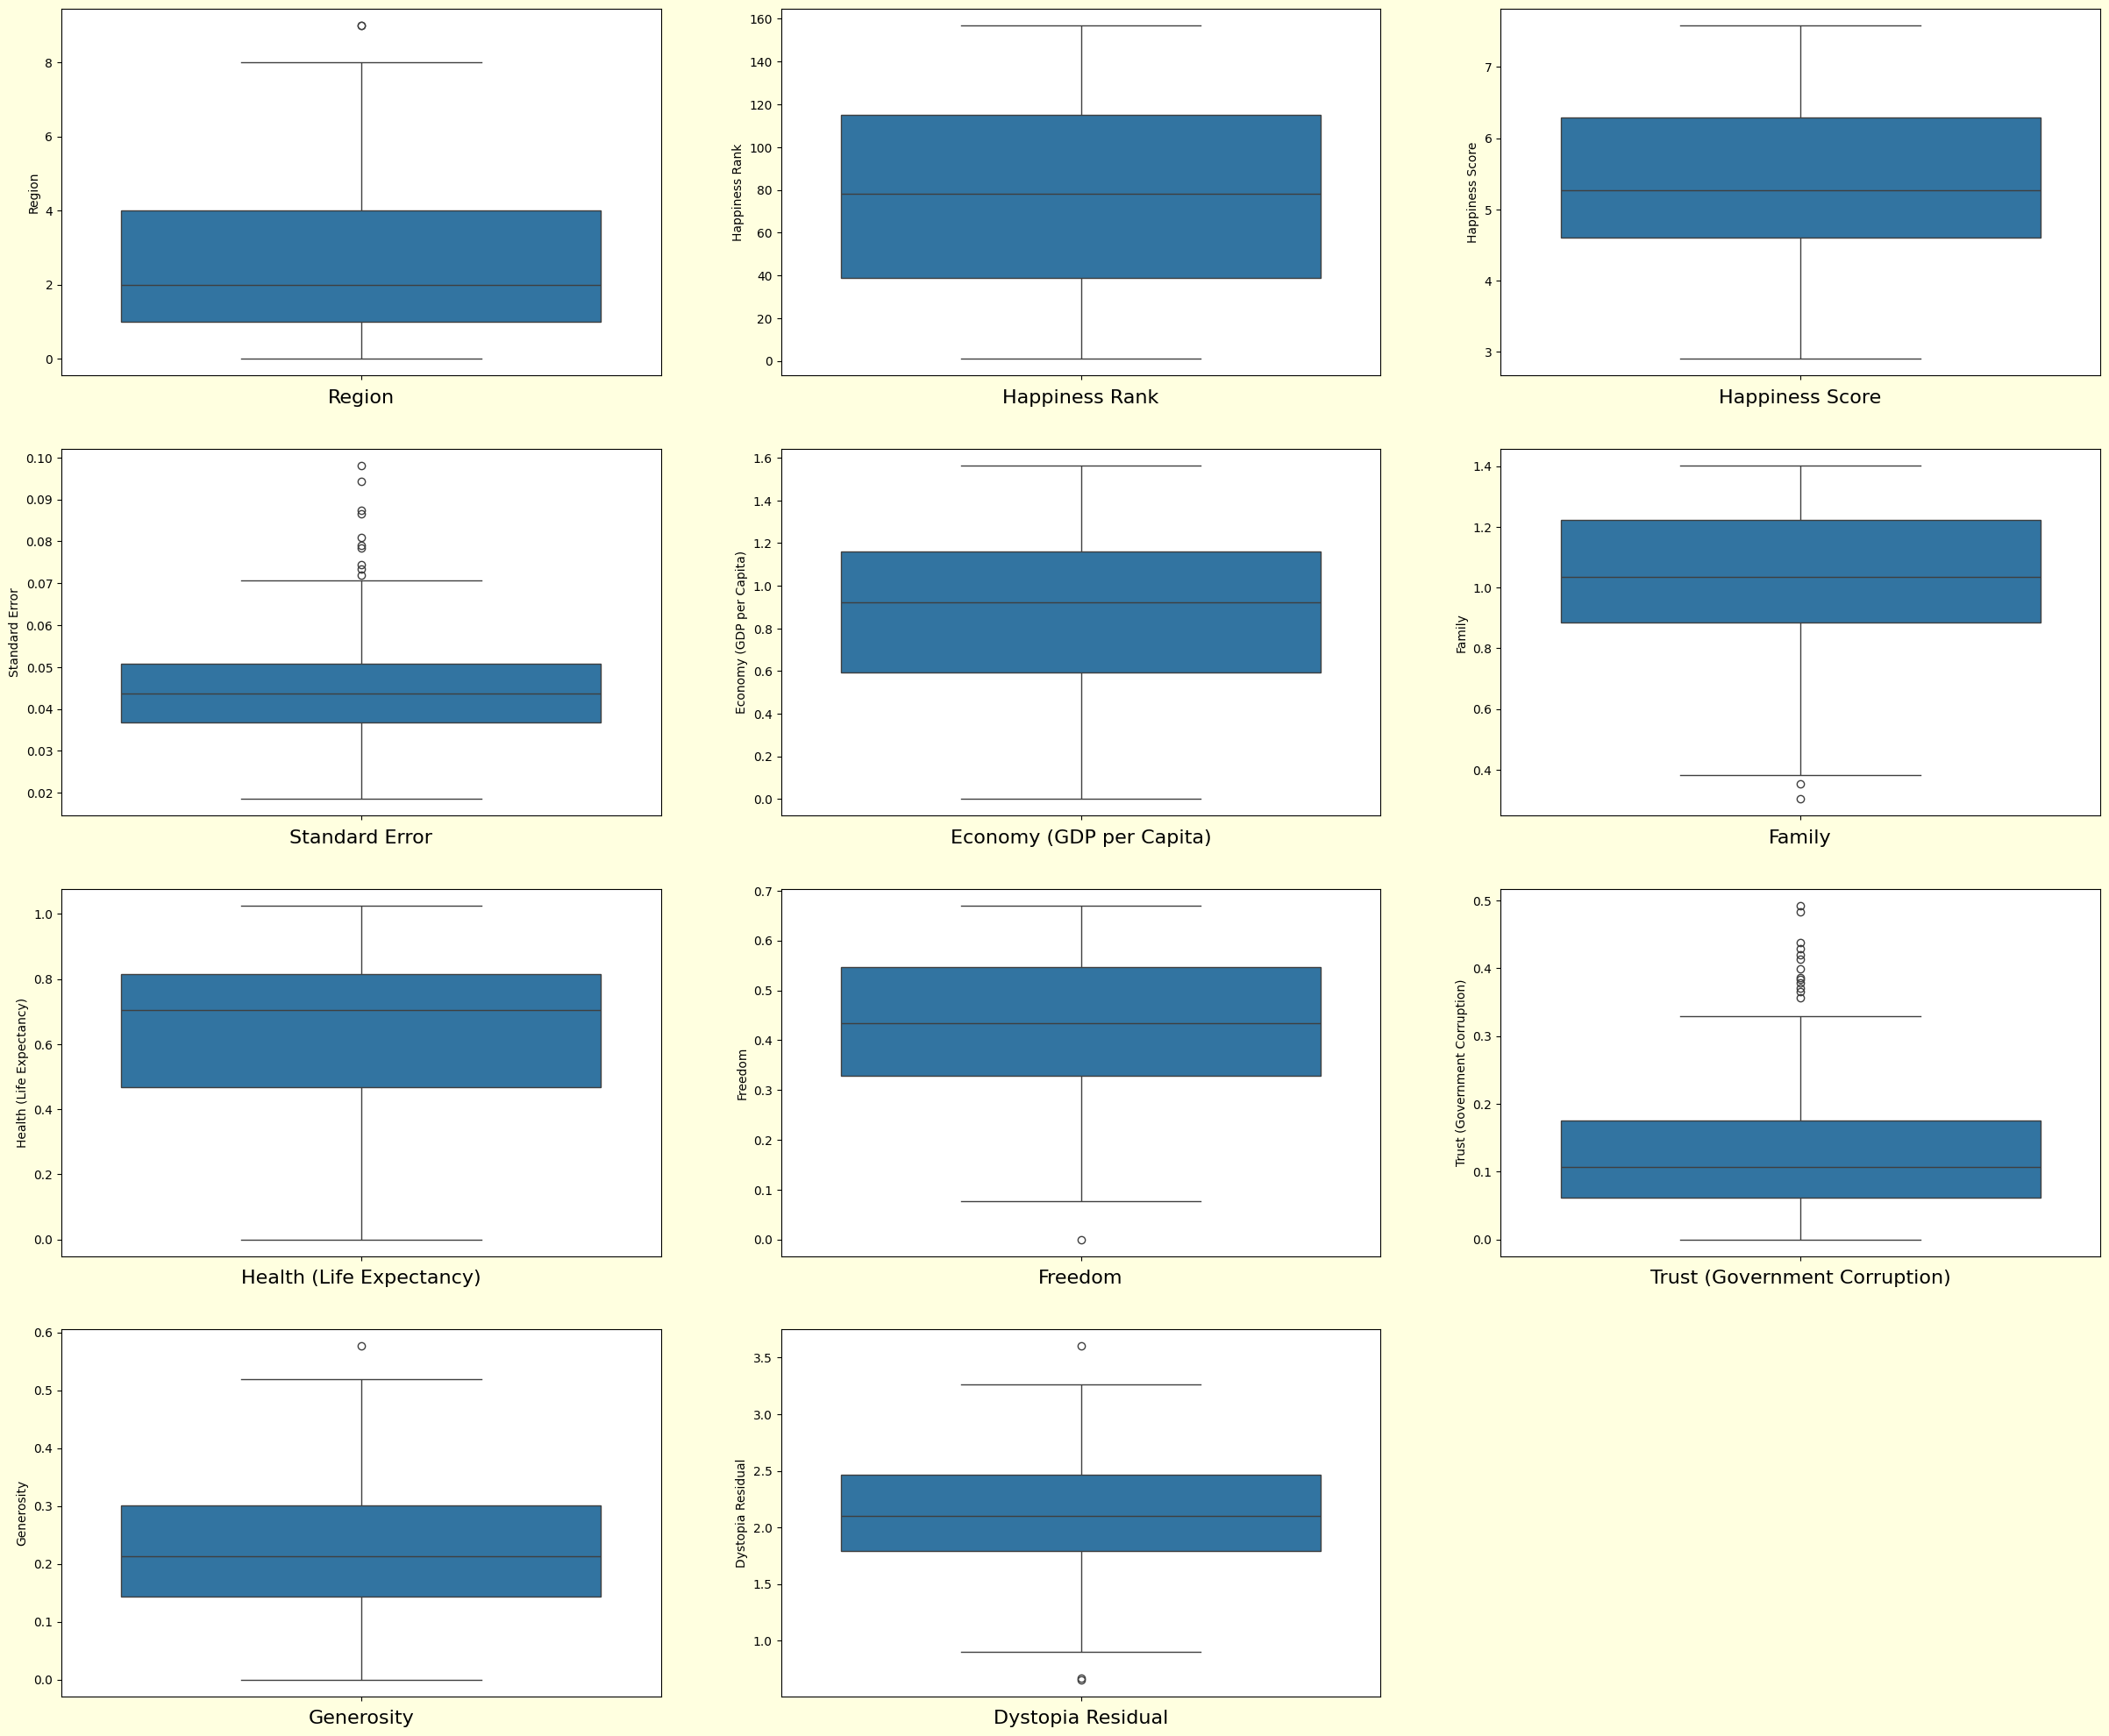

In [24]:
plt.figure(figsize = (30,25),facecolor = 'lightyellow')
plotnumber = 1

for column in dataset.columns:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(dataset[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber +=1
plt.show()

In [25]:
dataset.skew()

Region                           0.860194
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

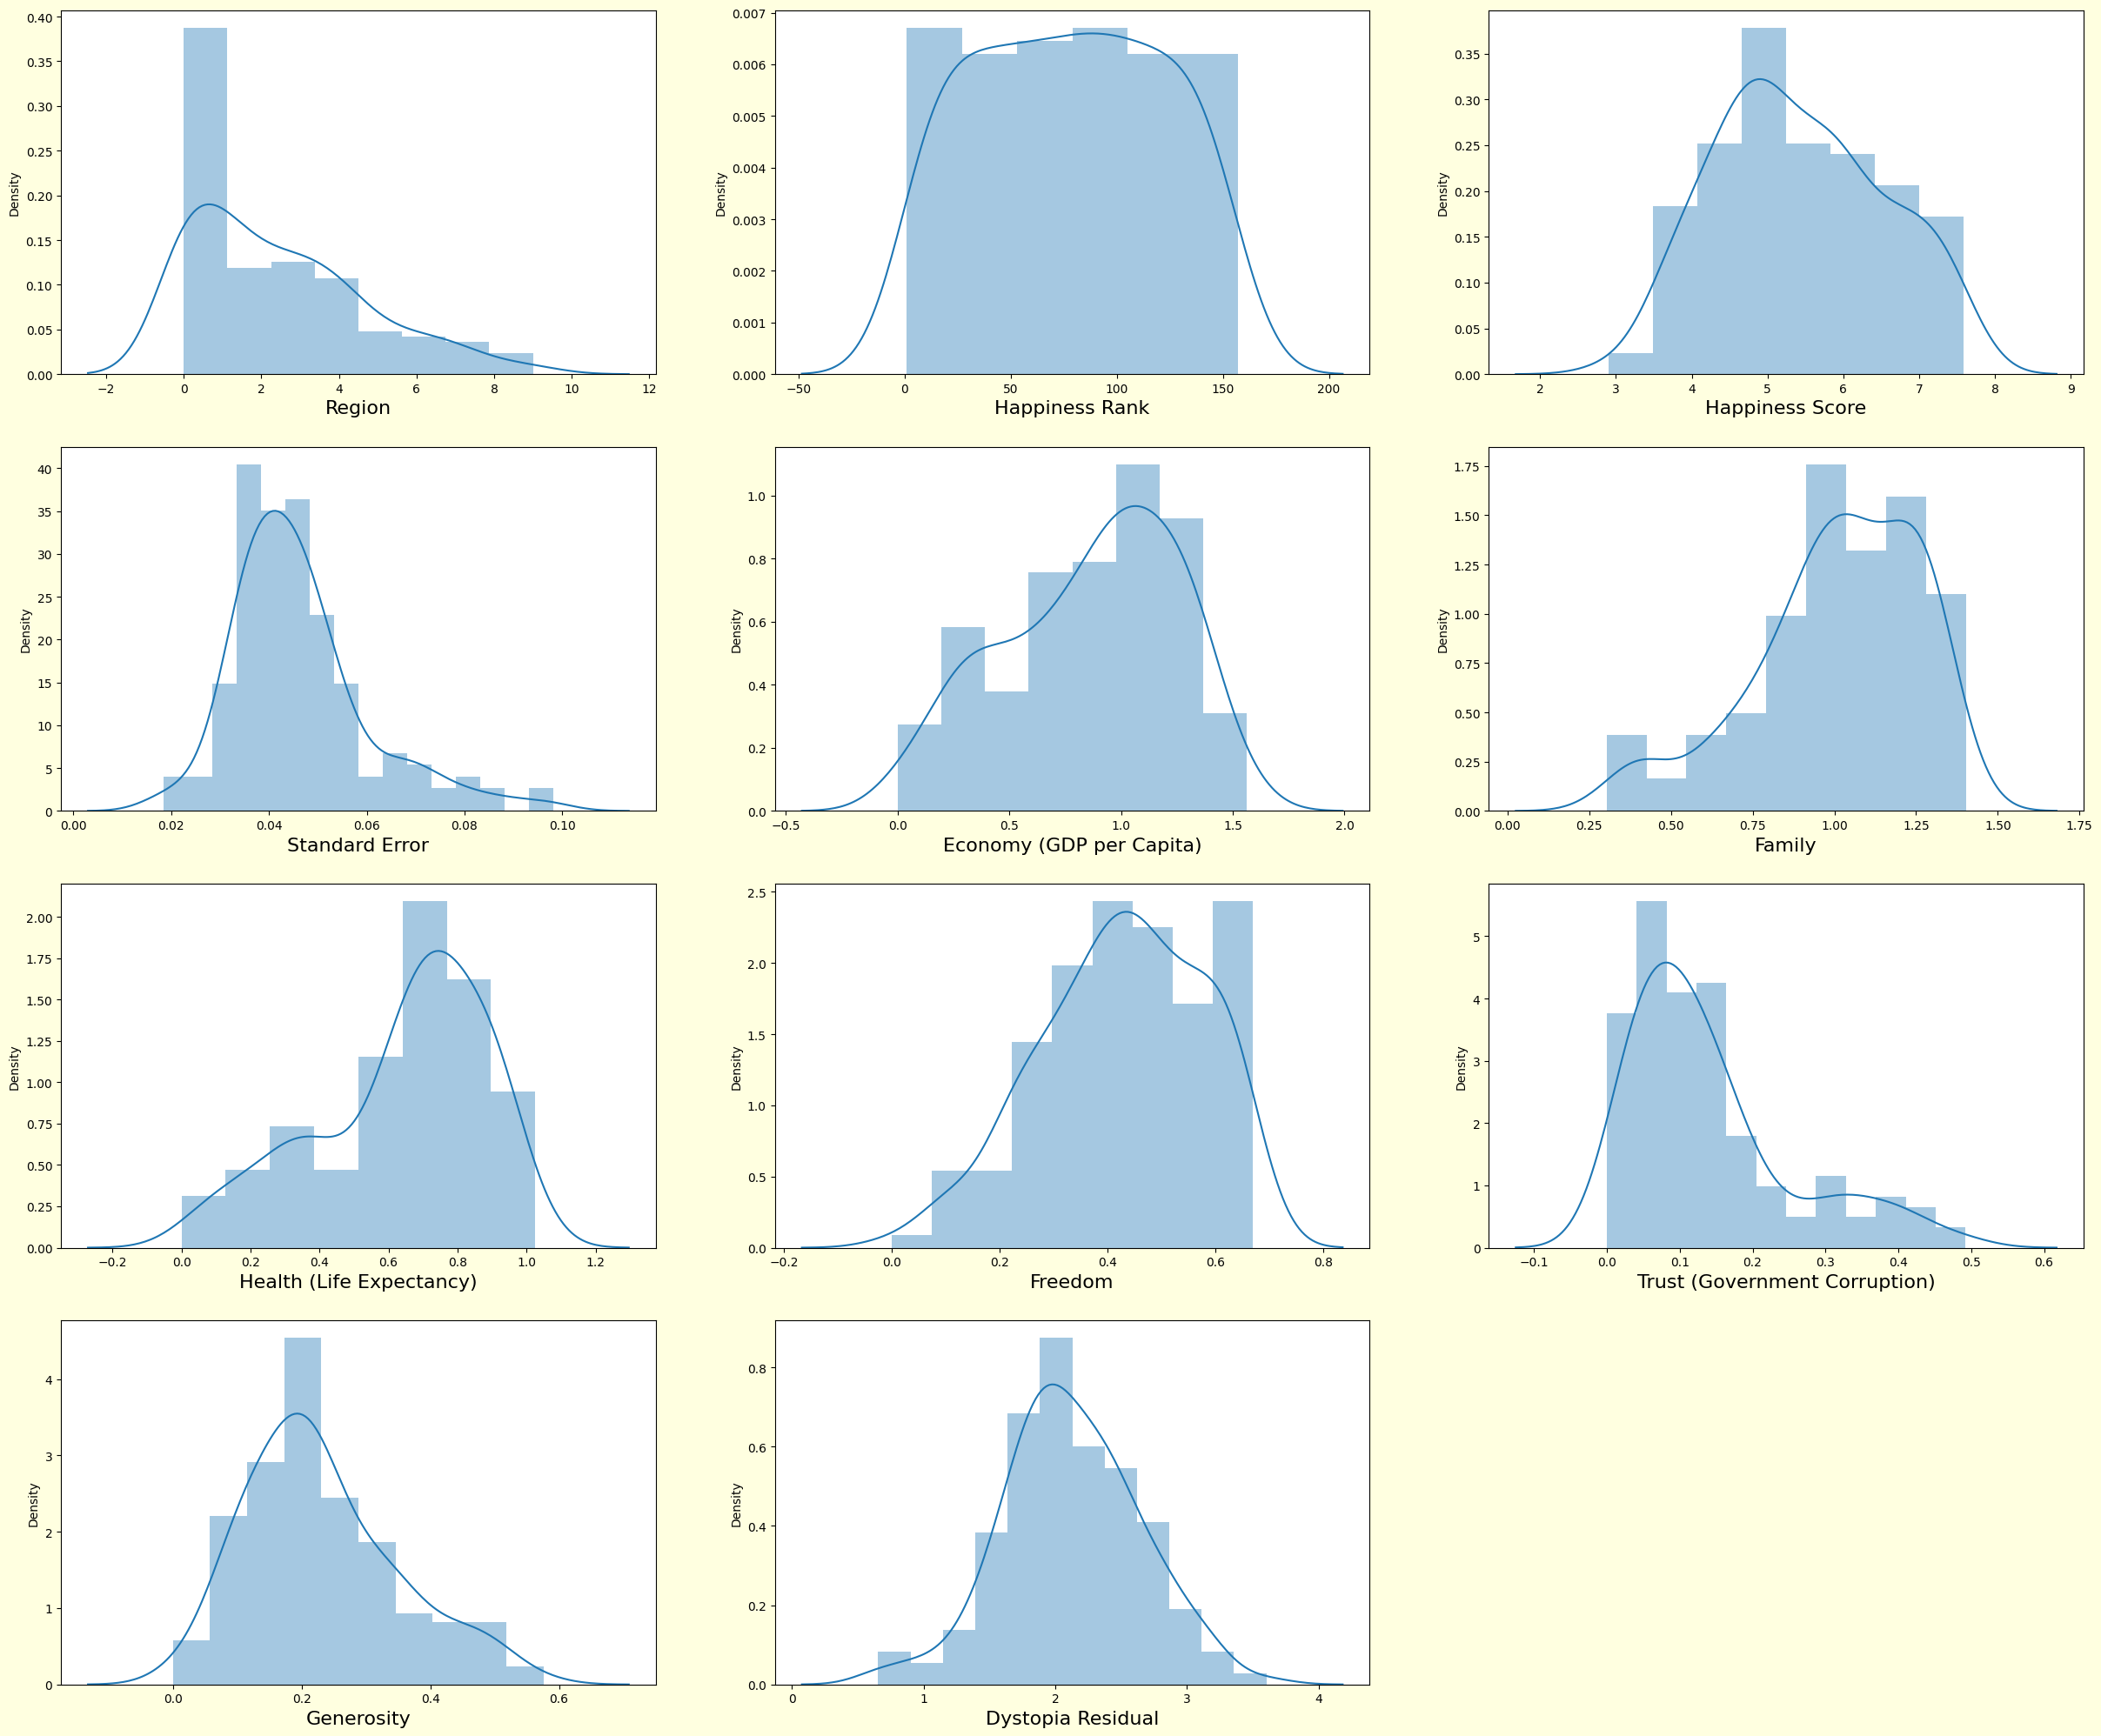

In [26]:
plt.figure(figsize = (30,25),facecolor = 'lightyellow')
plotnumber = 1

for column in dataset.columns:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize = 16)
    plotnumber +=1
plt.show() 

Check Relationship

In [27]:
dataset.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

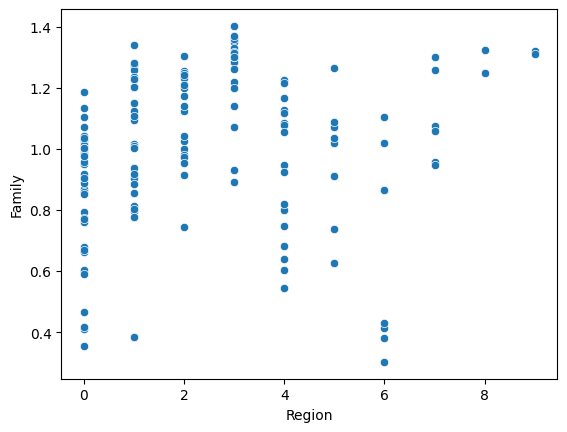

In [28]:
sns.scatterplot(x = 'Region', y = 'Family', data = dataset)
plt.show()

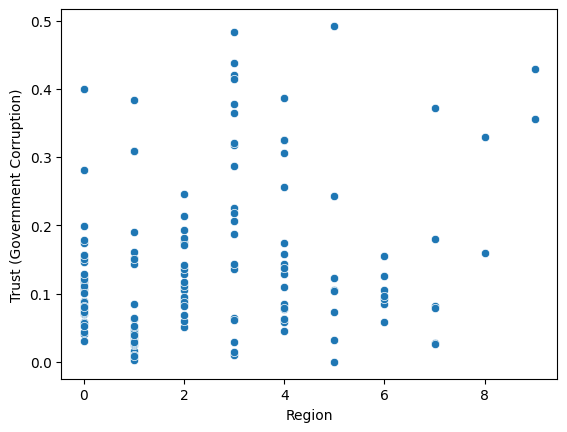

In [29]:
sns.scatterplot(x = 'Region', y = 'Trust (Government Corruption)', data = dataset)
plt.show()

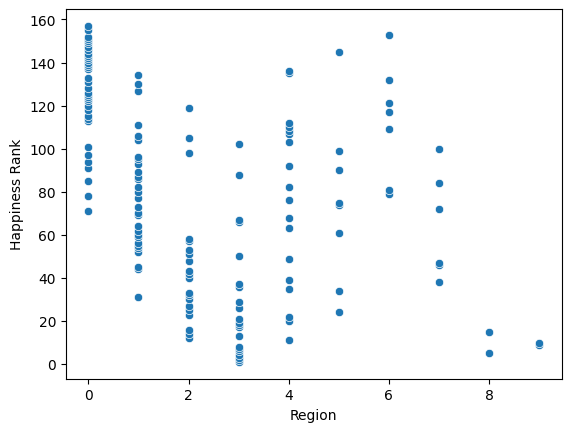

In [30]:
sns.scatterplot(x = 'Region', y = 'Happiness Rank', data = dataset)
plt.show()

Plot heatmap

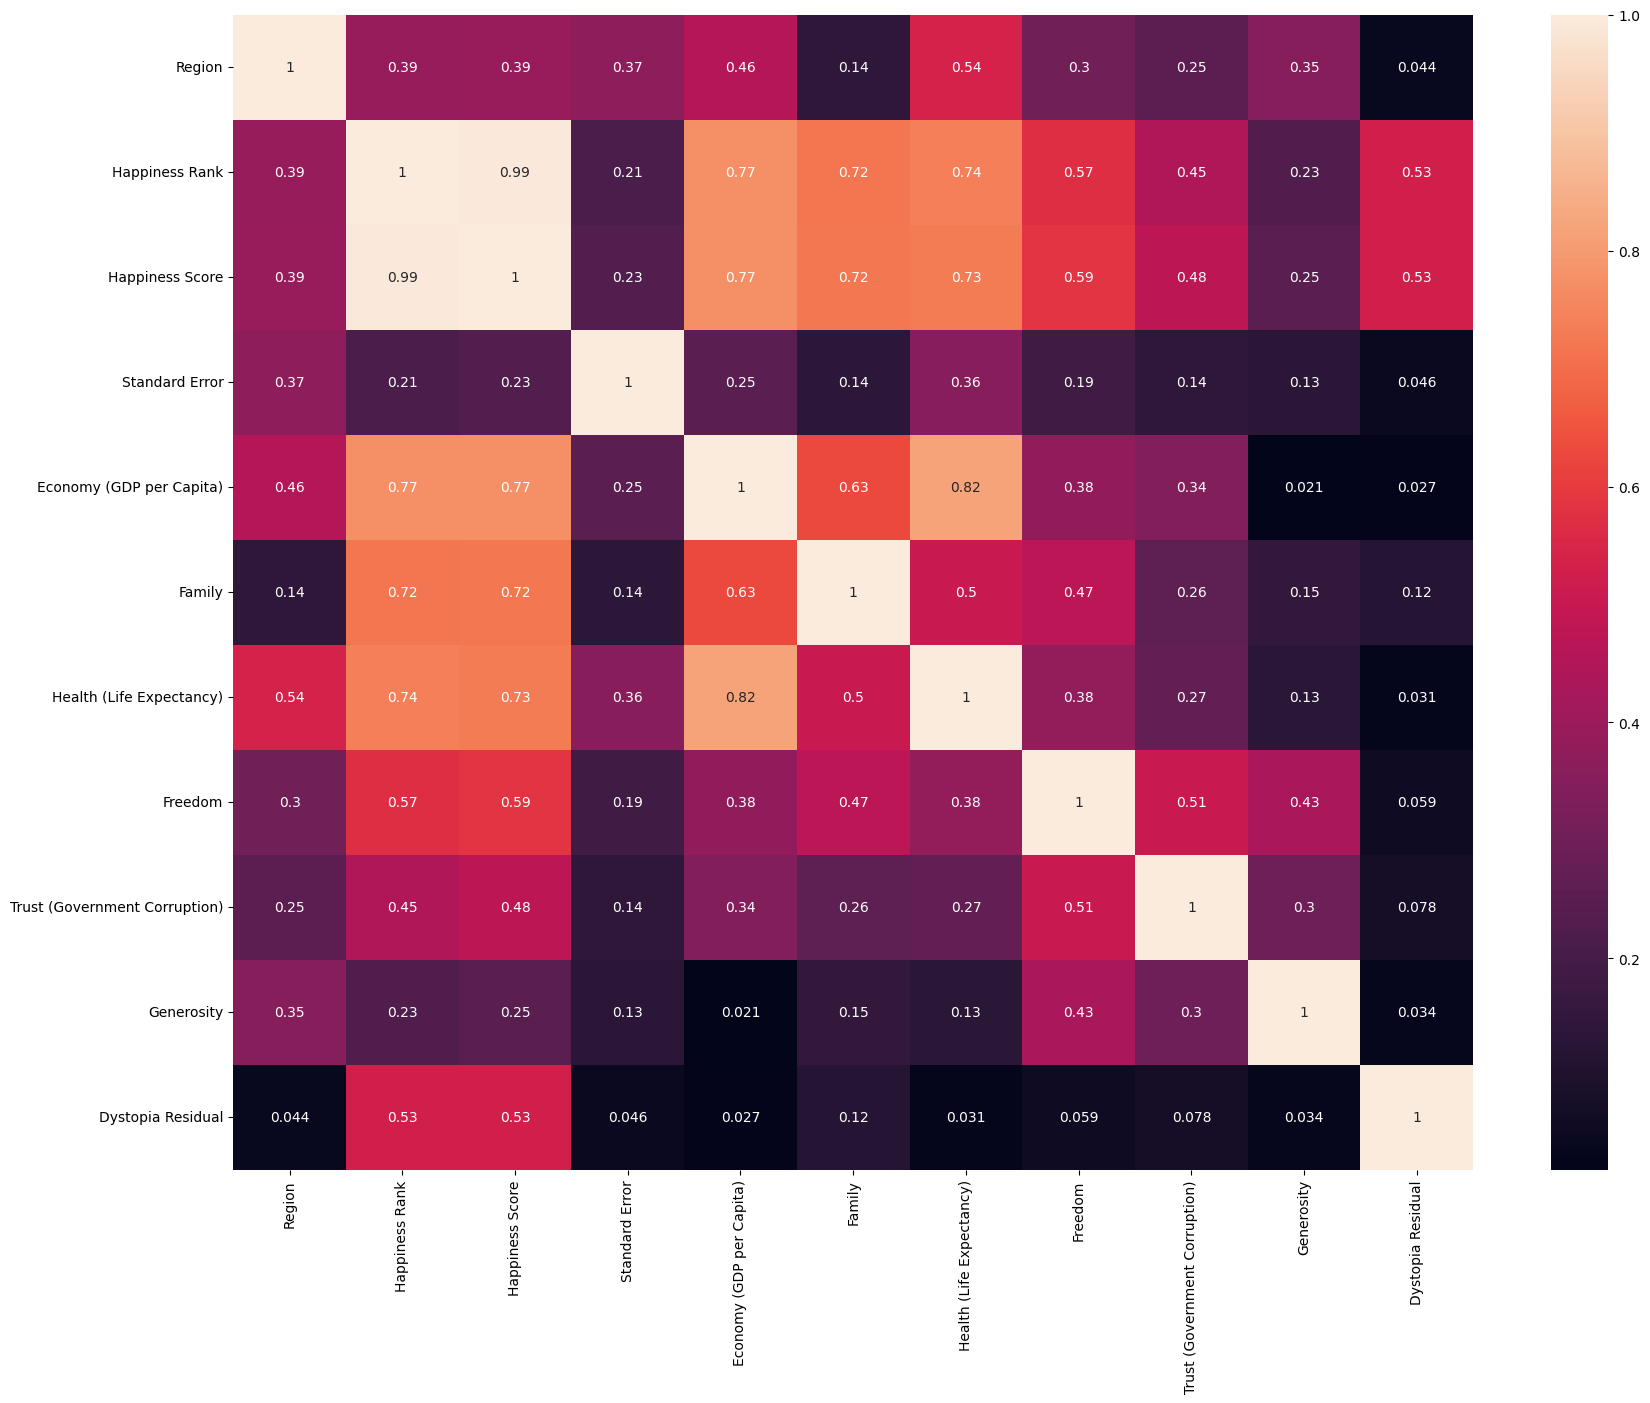

In [31]:
plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr().abs(), annot = True)
plt.show()

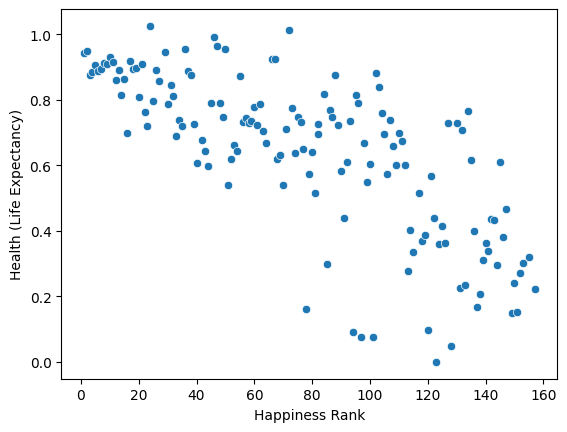

In [32]:
sns.scatterplot(x = 'Happiness Rank', y = 'Health (Life Expectancy)', data = dataset)
plt.show()

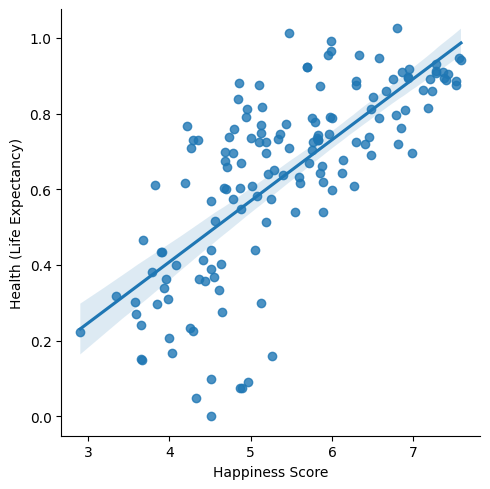

In [33]:
sns.lmplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = dataset)
plt.show()

Seems like Happiness Score and Health(Life Expectancy) are positively correlated

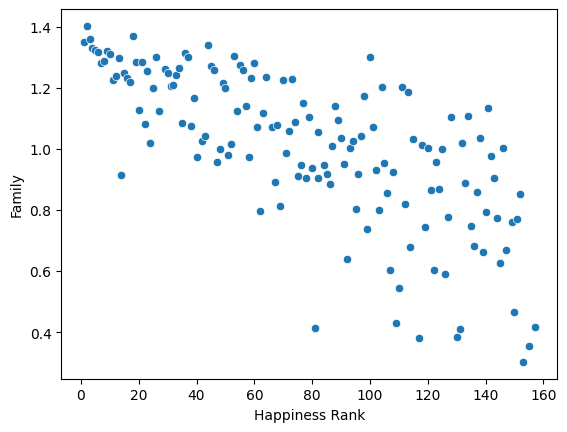

In [34]:
sns.scatterplot(x = 'Happiness Rank', y = 'Family', data = dataset)
plt.show()

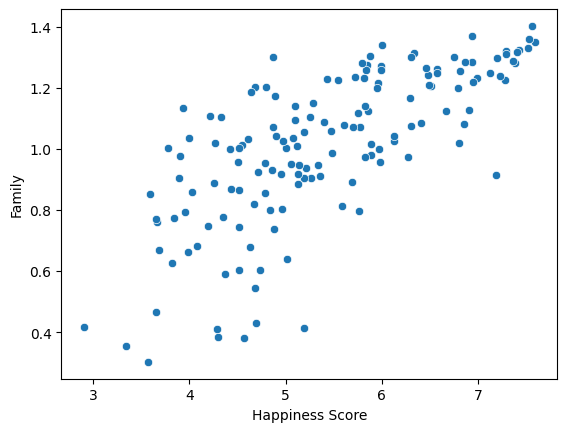

In [35]:
sns.scatterplot(x = 'Happiness Score', y = 'Family', data = dataset)
plt.show()

Seems like Happiness Score and Family are positively corelated

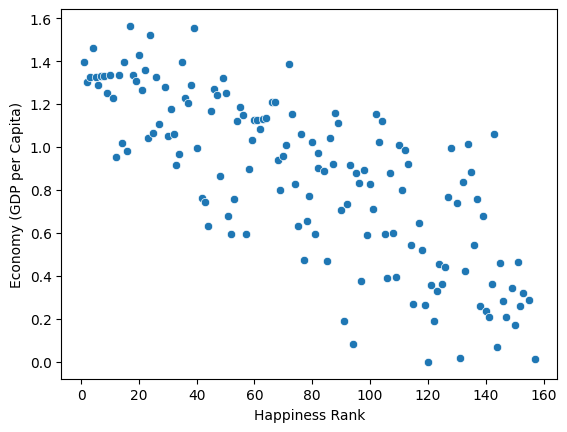

In [36]:
sns.scatterplot(x = 'Happiness Rank', y = 'Economy (GDP per Capita)', data = dataset)
plt.show()

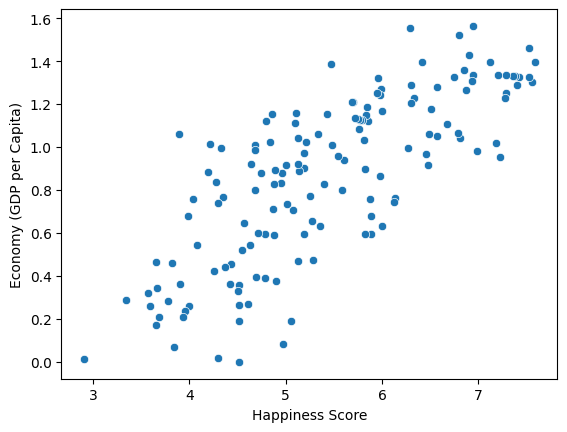

In [37]:
sns.scatterplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)', data = dataset)
plt.show()

Seems like Happiness Score and Economy are positively correlated

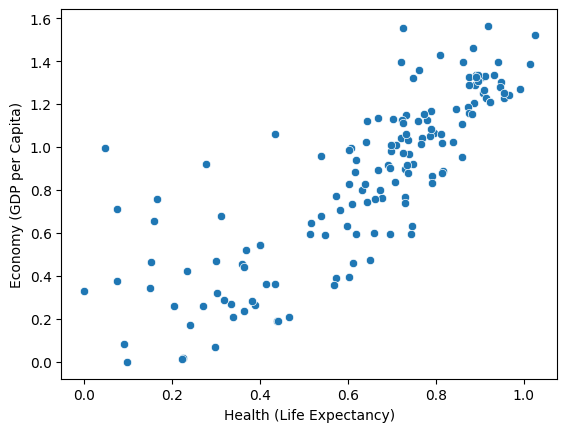

In [38]:
sns.scatterplot(x = 'Health (Life Expectancy)', y = 'Economy (GDP per Capita)', data = dataset)
plt.show()

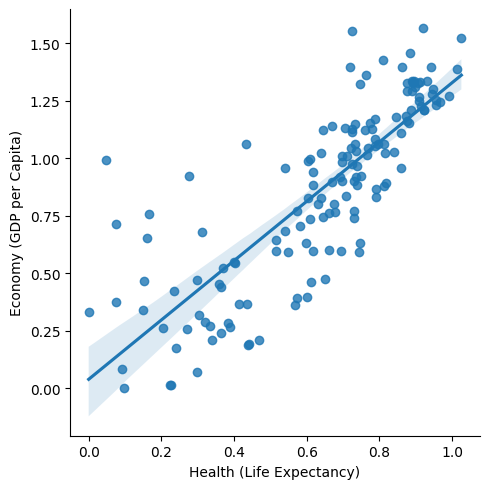

In [39]:
sns.lmplot(x = 'Health (Life Expectancy)', y = 'Economy (GDP per Capita)', data = dataset)
plt.show()

Both features Health and Economy are positively correlated also correlation coefficient of Economy with Happiness Score is higher than correlation coefficient of Health with Happiness Score

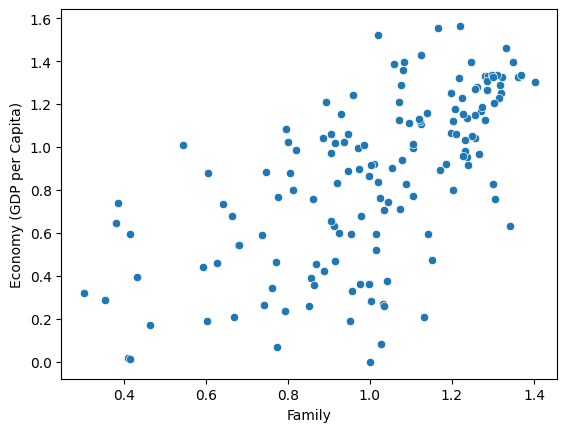

In [40]:
sns.scatterplot(x = 'Family', y = 'Economy (GDP per Capita)', data = dataset)
plt.show()

Use SelectKBest Feature Selection Method

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

In [42]:
X = dataset.drop(columns = ['Happiness Score'],axis = 1)
y = dataset['Happiness Score']

In [43]:
best_features = SelectKBest(score_func = f_classif, k = 10)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis = 1)
feature_scores.columns = ['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(10,'Score')) # print 17 best features

                    Feature_Name         Score
1                 Happiness Rank           inf
7  Trust (Government Corruption)  2.876372e+07
5       Health (Life Expectancy)  1.466265e+02
3       Economy (GDP per Capita)  5.781679e+01
9              Dystopia Residual  1.146680e+01
8                     Generosity  1.117897e+01
2                 Standard Error  7.848418e+00
4                         Family  5.798472e+00
0                         Region  1.115661e+00
6                        Freedom  9.064959e-01


Check Multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Feature'] = X.columns

vif

,Score,Feature
0,1.871730,Region
1,83.341444,Happiness Rank
2,1.268742,Standard Error
3,13.263763,Economy (GDP per Capita)
4,6.721808,Family
5,9.036228,Health (Life Expectancy)
6,3.502914,Freedom
7,1.905377,Trust (Government Corruption)
8,2.101491,Generosity
9,19.494200,Dystopia Residual


The vif score of Happiness Rank is almost 83 which is too high will cause severe multicollinearity issues so it is better to drop it!

In [45]:
new_X = dataset.drop(columns = ['Happiness Rank','Happiness Score'],axis = 1)

In [46]:
new_X

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,3,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,3,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,8,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,0,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,6,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [47]:
dataset['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329, 6.302,
       6.298, 6.295, 6.269, 6.13 , 6.123, 6.003, 5.995, 5.987, 5.984,
       5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855, 5.848, 5.833,
       5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754, 5.716, 5.695,
       5.689, 5.605, 5.589, 5.548, 5.477, 5.474, 5.429, 5.399, 5.36 ,
       5.332, 5.286, 5.268, 5.253, 5.212, 5.194, 5.192, 5.14 , 5.129,
       5.124, 5.123, 5.102, 5.098, 5.073, 5.057, 5.013, 5.007, 4.971,
       4.959, 4.949, 4.898, 4.885, 4.876, 4.874, 4.867, 4.857, 4.839,
       4.8  , 4.788, 4.786, 4.739, 4.715, 4.694, 4.686, 4.681, 4.677,
       4.642, 4.633, 4.61 , 4.565, 4.55 , 4.518, 4.517, 4.514, 4.512,
       4.507, 4.436, 4.419, 4.369, 4.35 , 4.332, 4.297, 4.292, 4.271,
       4.252, 4.218,

In [48]:
X_scaled = scaler.fit_transform(new_X)

Find the Best Random State

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from sklearn.svm import SVR

In [50]:
maxAcc = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print('We get Maximum Accuracy = ',maxAcc,' at random state = ', maxRS)

We get Maximum Accuracy =  0.999999948927289  at random state =  194


In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr_test = lr.predict(x_test)
pred_lr_train = lr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lr_test)))

R2 SCORE ON TESTING DATA  0.999999948927289
R2 SCORE ON TRAINING DATA  0.9999999283703637
MEAN ABSOLUTE ERROR  0.00023929289464109536
MEAN SQUARED ERROR  7.9230570717718e-08
ROOT MEAN SQUARED ERROR  0.015469094822939556


In [53]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred_ada_test = ada.predict(x_test)
pred_ada_train = ada.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ada_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ada_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ada_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ada_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ada_test)))

R2 SCORE ON TESTING DATA  0.8610182144522367
R2 SCORE ON TRAINING DATA  0.9553472657659545
MEAN ABSOLUTE ERROR  0.3666502919404628
MEAN SQUARED ERROR  0.21560645579248844
ROOT MEAN SQUARED ERROR  0.605516549683378


In [54]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb_test = gb.predict(x_test)
pred_gb_train = gb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_gb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_gb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_gb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_gb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_gb_test)))

R2 SCORE ON TESTING DATA  0.9325822471161952
R2 SCORE ON TRAINING DATA  0.9996652449484601
MEAN ABSOLUTE ERROR  0.2360751695242233
MEAN SQUARED ERROR  0.10458710614115362
ROOT MEAN SQUARED ERROR  0.48587567290843375


In [55]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb_test = xgb.predict(x_test)
pred_xgb_train = xgb.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_xgb_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_xgb_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_xgb_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_xgb_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_xgb_test)))

R2 SCORE ON TESTING DATA  0.9238020706129393
R2 SCORE ON TRAINING DATA  0.9999995462952496
MEAN ABSOLUTE ERROR  0.271941467751397
MEAN SQUARED ERROR  0.11820804740074703
ROOT MEAN SQUARED ERROR  0.5214800741652522


In [56]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr_test = rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_rfr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_rfr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_rfr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_rfr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_rfr_test)))

R2 SCORE ON TESTING DATA  0.8890754827289362
R2 SCORE ON TRAINING DATA  0.9821252164425464
MEAN ABSOLUTE ERROR  0.32354
MEAN SQUARED ERROR  0.17208040560888893
ROOT MEAN SQUARED ERROR  0.5688057664967893


In [57]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_dt_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_dt_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_dt_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_dt_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_dt_test)))

R2 SCORE ON TESTING DATA  0.8378038446493112
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.40179999999999993
MEAN SQUARED ERROR  0.2516195777777777
ROOT MEAN SQUARED ERROR  0.6338769596696191


In [58]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn_test = dt.predict(x_test)
pred_knn_train = dt.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_knn_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_knn_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_knn_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_knn_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_knn_test)))

R2 SCORE ON TESTING DATA  0.8378038446493112
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.40179999999999993
MEAN SQUARED ERROR  0.2516195777777777
ROOT MEAN SQUARED ERROR  0.6338769596696191


In [59]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso_test = lasso.predict(x_test)
pred_lasso_train = lasso.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_lasso_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_lasso_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_lasso_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_lasso_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_lasso_test)))

R2 SCORE ON TESTING DATA  -0.005584549417572582
R2 SCORE ON TRAINING DATA  0.0
MEAN ABSOLUTE ERROR  1.096122222222222
MEAN SQUARED ERROR  1.5599923388888888
ROOT MEAN SQUARED ERROR  1.0469585580252077


In [60]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge_test = ridge.predict(x_test)
pred_ridge_train = ridge.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_ridge_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_ridge_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_ridge_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_ridge_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_ridge_test)))

R2 SCORE ON TESTING DATA  0.9999522173017239
R2 SCORE ON TRAINING DATA  0.9999521785557632
MEAN ABSOLUTE ERROR  0.00723310613704729
MEAN SQUARED ERROR  7.412667913933669e-05
ROOT MEAN SQUARED ERROR  0.08504766979198954


In [61]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr_test = etr.predict(x_test)
pred_etr_train = etr.predict(x_train)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred_etr_test))
print('R2 SCORE ON TRAINING DATA ', r2_score(y_train,pred_etr_train))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred_etr_test))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred_etr_test))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred_etr_test)))

R2 SCORE ON TESTING DATA  0.9201913408234637
R2 SCORE ON TRAINING DATA  1.0
MEAN ABSOLUTE ERROR  0.26214044444444395
MEAN SQUARED ERROR  0.12380947675111076
ROOT MEAN SQUARED ERROR  0.5119965277660035


In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
score = cross_val_score(lr,X_scaled,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lr_test) - score.mean())

[0.99999942 0.99999847 0.9999983  0.99999511 0.99999932]
0.9999981253935243
Difference between R2 score and cross validation score is:  1.8235337647665162e-06


In [64]:
score1 = cross_val_score(ada,X_scaled,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ada_test) - score1.mean())

[-9.6333509  -6.53691711 -2.9589144  -5.43491363 -7.67089111]
-6.4469974283157665
Difference between R2 score and cross validation score is:  7.308015642768003


In [65]:
score2 = cross_val_score(gb,X_scaled,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_gb_test) - score2.mean())

[-4.22389493  0.07289692 -0.7051495  -2.62942957 -3.96682246]
-2.2904799077744493
Difference between R2 score and cross validation score is:  3.2230621548906444


In [66]:
score3 = cross_val_score(xgb,X_scaled,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_xgb_test) - score3.mean())

[-5.83673718 -1.30249265 -1.87660609 -4.17016317 -6.51794786]
-3.940789387529891
Difference between R2 score and cross validation score is:  4.86459145814283


In [67]:
score4 = cross_val_score(rfr,X_scaled,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_rfr_test) - score4.mean())

[-7.36281395 -0.82653574 -0.36270532 -2.46625852 -6.24910092]
-3.4534828913313254
Difference between R2 score and cross validation score is:  4.342558374060261


In [68]:
score5 = cross_val_score(dt,X_scaled,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_dt_test) - score5.mean())

[ -5.48425362 -11.88233808  -6.83849087 -12.91842765  -5.64093104]
-8.552888252655249
Difference between R2 score and cross validation score is:  9.39069209730456


In [69]:
score6 = cross_val_score(knn,X_scaled,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_knn_test) - score6.mean())

[-9.89143723 -2.62141079 -1.83636515 -3.8480344  -5.74847402]
-4.789144318857282
Difference between R2 score and cross validation score is:  5.626948163506594


In [70]:
score7 = cross_val_score(lasso,X_scaled,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_lasso_test) - score7.mean())

[-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ]
-23.099531692553747
Difference between R2 score and cross validation score is:  23.093947143136173


In [71]:
score8 = cross_val_score(ridge,X_scaled,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_ridge_test) - score8.mean())

[0.99512761 0.99956785 0.99919421 0.99881703 0.9980689 ]
0.9981551214275564
Difference between R2 score and cross validation score is:  0.0017970958741675425


In [72]:
score9 = cross_val_score(etr,X_scaled,y)
print(score9)
print(score9.mean())
print('Difference between R2 score and cross validation score is: ', r2_score(y_test,pred_etr_test) - score9.mean())

[-7.24469335 -0.39247857 -0.59584801 -1.42080865 -5.8391671 ]
-3.098599135537815
Difference between R2 score and cross validation score is:  4.0187904763612785


Difference between R2 score and cross validation score for LinearRegression is least as compared to other models so Linear Regression is best fitted model

In [73]:
help(lr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

HyperParameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_jobs': [1,-1],
    'fit_intercept': [True,False]    
}

In [75]:
grid_search = GridSearchCV(LinearRegression(),param_grid = param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, -1]})

In [76]:
grid_search.best_estimator_

LinearRegression(n_jobs=1)

In [77]:
grid_search.best_params_

{'fit_intercept': True, 'n_jobs': 1}

In [79]:
grid_search.best_score_

0.999999901942384

In [80]:
final_model = grid_search.best_estimator_
pred = final_model.predict(x_test)
print('R2 SCORE ON TESTING DATA ', r2_score(y_test,pred))
print('MEAN ABSOLUTE ERROR ', mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROR ', mean_squared_error(y_test,pred))
print('ROOT MEAN SQUARED ERROR ', np.sqrt(mean_absolute_error(y_test,pred)))

R2 SCORE ON TESTING DATA  0.999999948927289
MEAN ABSOLUTE ERROR  0.00023929289464109536
MEAN SQUARED ERROR  7.9230570717718e-08
ROOT MEAN SQUARED ERROR  0.015469094822939556


In [81]:
import joblib
joblib.dump(final_model,"World Happiness Report Project.pkl")

['World Happiness Report Project.pkl']

In [82]:
model = joblib.load('World Happiness Report Project.pkl')

In [83]:
pred = model.predict(x_test)
pred

array([3.66725555, 5.10157179, 3.68094472, 7.27766935, 7.37813341,
       6.9372925 , 4.36924992, 4.29260694, 4.73857361, 7.58687781,
       4.78793892, 4.69399681, 6.78620379, 6.98253836, 4.55062691,
       6.66969631, 4.419349  , 3.78086853, 7.52215743, 5.25282353,
       6.81016339, 5.83257762, 4.97120404, 5.95961566, 5.68873429,
       4.43564002, 6.86723452, 5.2119177 , 3.9557143 , 6.32884004,
       4.51438026, 7.18730057, 6.13013876, 4.51236165, 5.58868079,
       4.0330407 , 6.00272379, 5.71576181, 7.28599713, 3.58690868,
       5.12312238, 5.82408686, 4.33203696, 7.22567551, 3.65510972])

In [84]:
model.score(x_test,y_test)

0.999999948927289